Name: Aayam Raj Shakya (as5160)

In [1]:
# importing everything at once
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

# REFERENCE: https://www.geeksforgeeks.org/how-to-disable-python-warnings/
# Hiding warnings for cleaner look
import warnings
warnings.filterwarnings('ignore')

3.2. Experiment all the examples on pp. 38–51, Python Machine Learning, 3rd Ed.. Through the examples, you will learn

(a) Gradient descent rule for Adaline

(b) Feature scaling techniques

(c) Stochastic gradient descent rule for Adaline

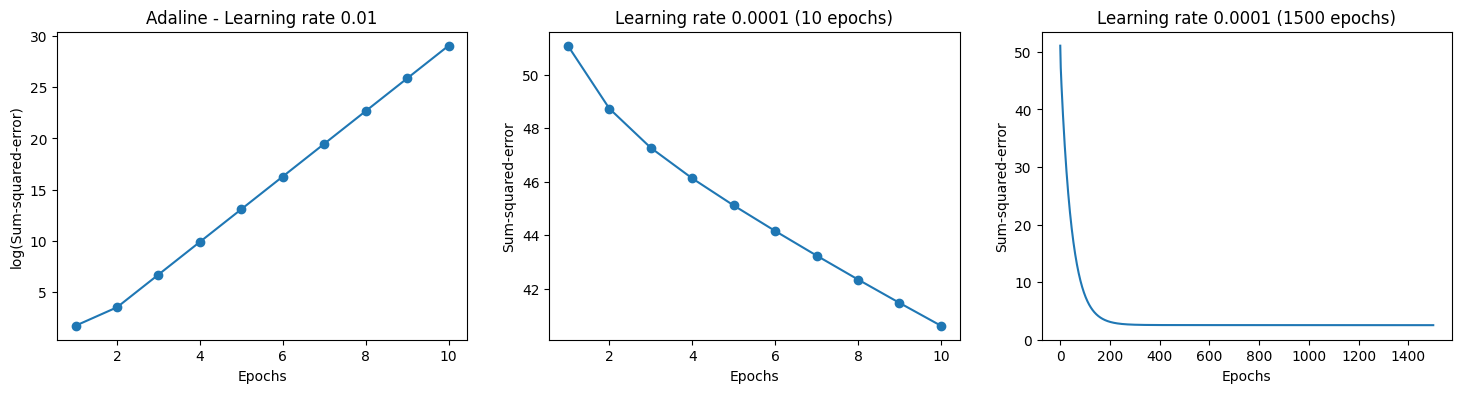

In [2]:
# Page 31-32
# Loading the iris dataset

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris', 'iris.data')

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values


# Page 34-35
# Decision boundary visualizer

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')


# Page 40-41
# Gradient descent rule for Adaline

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


# Page 42-43
# slightly modifies to add 3rd plot

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Learning rate 0.0001 (10 epochs)')

ada3 = AdalineGD(n_iter=1500, eta=0.0001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Learning rate 0.0001 (1500 epochs)')
ax[2].set_ylim(0)

plt.show()

According to the above plot diagrams, setting bigger learning rate of `0.01` meant that the model overshot and would never reach the minima and thus will keep on increasing the loss function. Meanwhile, setting smaller learning rate of `0.0001` meant that the model will get stuck in suboptimal solution and may take unnecessarily longer time and epoch to reach the minima or may not even reach it at all.

In the extreme right diagram, the training stagnates from ~200th epoch.

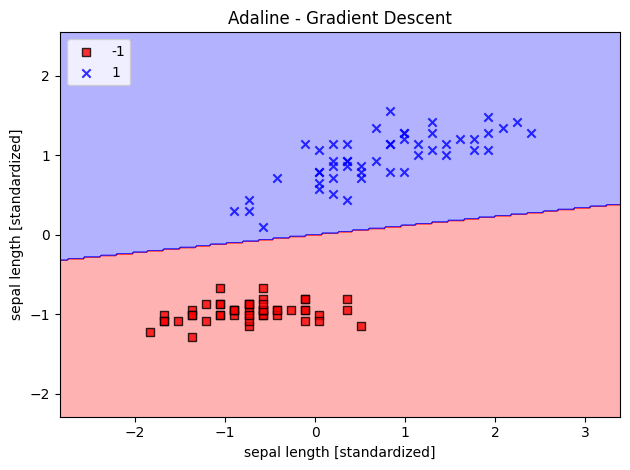

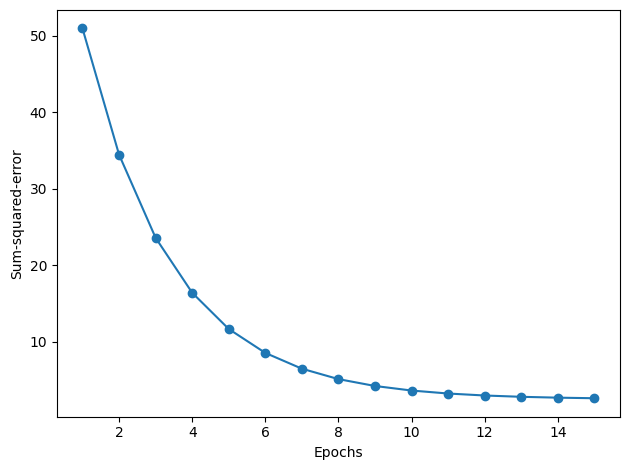

In [3]:
# Page 45
# Feature scaling

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal length [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1),
         ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

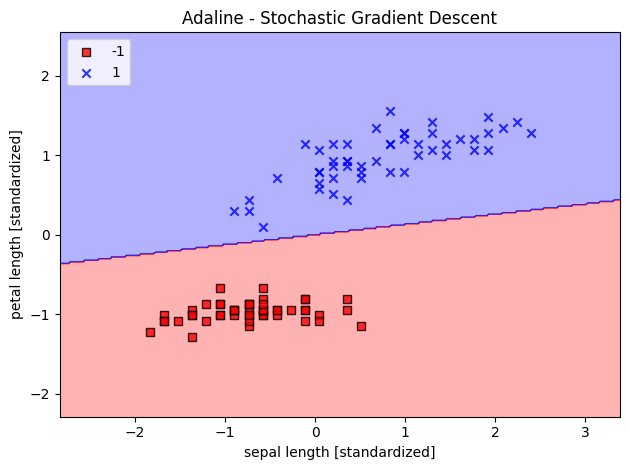

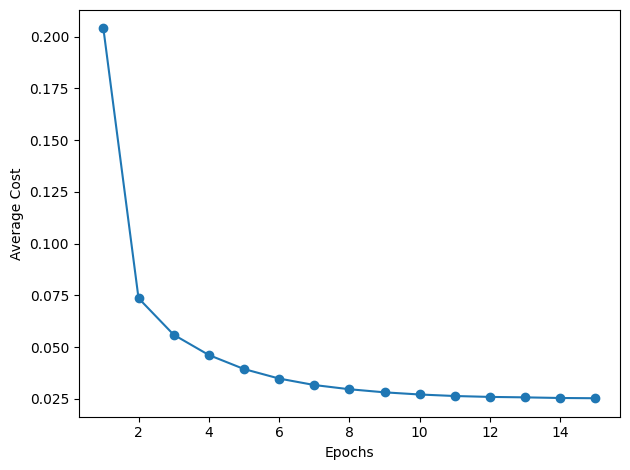

In [4]:
# Page 48
# Stochastic Gradient Descent

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Random number generator seed for random weight initialization.


    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training examples in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=10,
                 shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of
            examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ =  self.rgen.normal(loc=0.0, scale=0.01,
                                    size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_,
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

3.3. Perturb the dataset (X) by a random Gaussian noise Gσ of an observable σ (so as for Gσ(X) not to be linearly separable) and do the examples in Exercise 3.2 again.

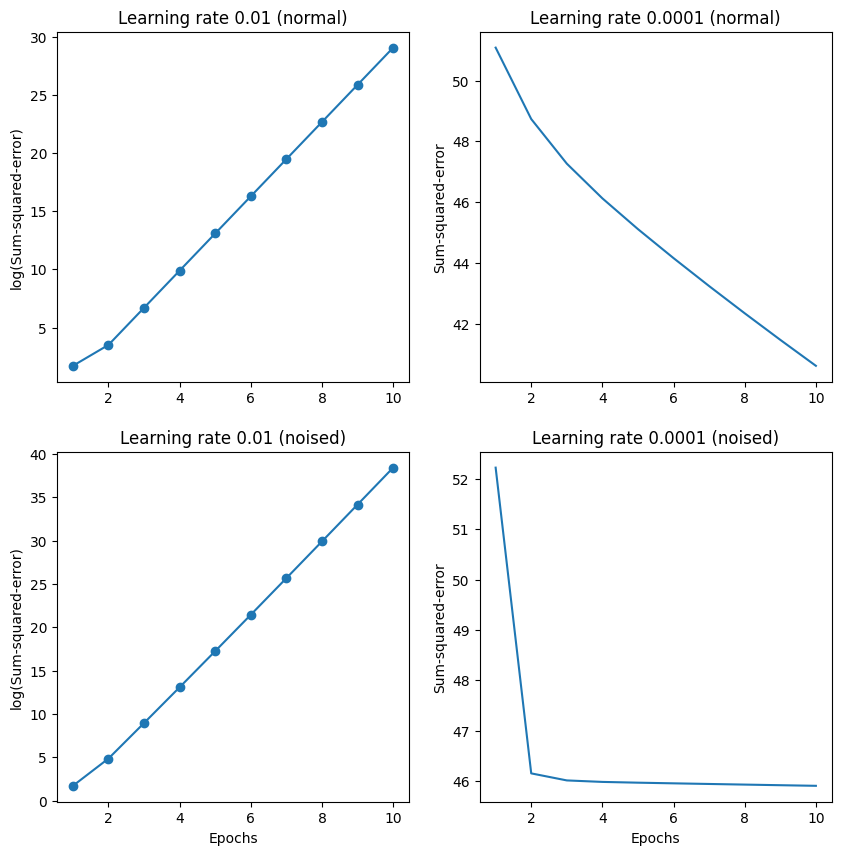

In [5]:
# NO NEED TO DEFINE ADALINE CLASS AGAIN

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# parameters are (mean, std_dev, output_shape)
# Reference: https://shorturl.at/c2HzN
gaussian_noise = np.random.normal(0, 10, X.shape)
X_noised = X + gaussian_noise

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#------------------------------------------------------------------------------
# Normal data

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0][0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
# ax[0][0].set_xlabel('Epochs')
ax[0][0].set_ylabel('log(Sum-squared-error)')
ax[0][0].set_title('Learning rate 0.01 (normal)')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[0][1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_)
# ax[0][1].set_xlabel('Epochs')
ax[0][1].set_ylabel('Sum-squared-error')
ax[0][1].set_title('Learning rate 0.0001 (normal)')

#------------------------------------------------------------------------------
# Noised data

ada3 = AdalineGD(n_iter=10, eta=0.01).fit(X_noised, y)
ax[1][0].plot(range(1, len(ada3.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[1][0].set_xlabel('Epochs')
ax[1][0].set_ylabel('log(Sum-squared-error)')
ax[1][0].set_title('Learning rate 0.01 (noised)')

ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(X_noised, y)
ax[1][1].plot(range(1, len(ada4.cost_) + 1), ada4.cost_)
ax[1][1].set_xlabel('Epochs')
ax[1][1].set_ylabel('Sum-squared-error')
ax[1][1].set_title('Learning rate 0.0001 (noised)')

plt.show()

NORMAL DATA



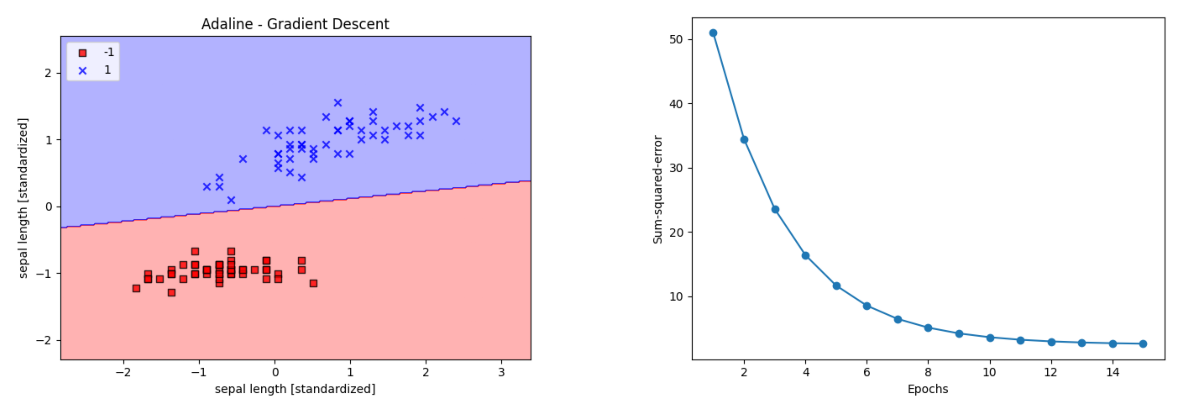


ALTERED DATA



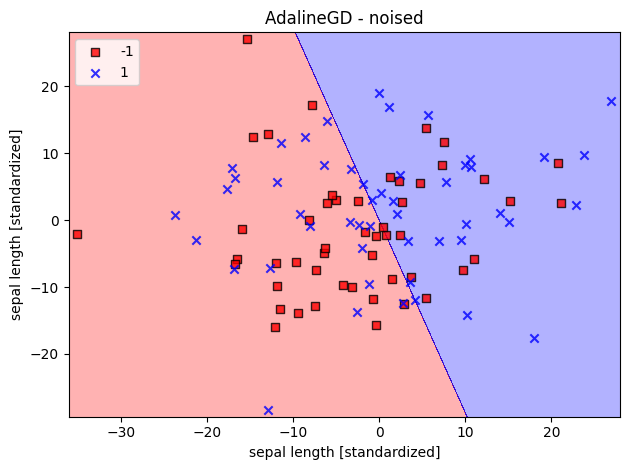

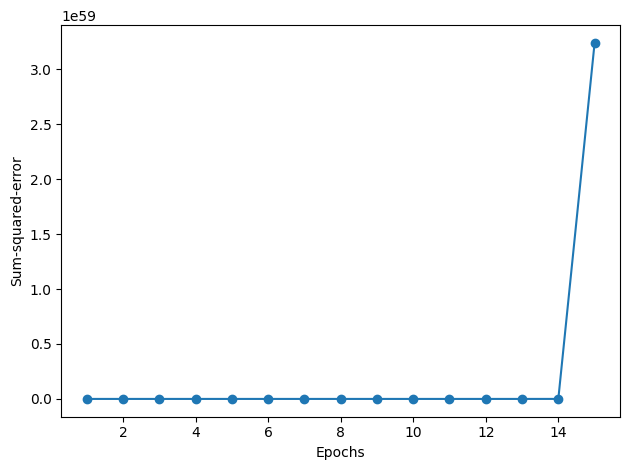

In [6]:
# NO NEED TO DEFINE AdalineGD AGAIN

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# Adding some noise with a std_dev so that the data is not lineary separable
gaussian_noise = np.random.normal(0, 10, X.shape)
X_std_noised = X_std + gaussian_noise

ada_gd = AdalineGD(n_iter=15, eta=0.01)

# training the model with noised data
ada_gd.fit(X_std_noised, y)

print("NORMAL DATA\n")
# REFERENCE: https://shorturl.at/xnIzu
import matplotlib.image as mpimg
figure = plt.figure(figsize=(15,10))
image1 = plt.subplot(121)
image2 = plt.subplot(122)
_ = image1.imshow(mpimg.imread('/content/adaline_decision_boundary.png'))
_ = image2.imshow(mpimg.imread('/content/adaline_epoch.png'))
image1.axis("off")
image2.axis("off")
plt.show()

print("\nALTERED DATA\n")
plot_decision_regions(X_std_noised, y, classifier=ada_gd)
plt.title('AdalineGD - noised')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal length [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1),
         ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

As I added noise to the training data with a std. dev. of 10, the model started getting poisoned data, hence it could no longer separate the data points correctly. Even the loss function started increasing from 14th epoch.

NORMAL DATA



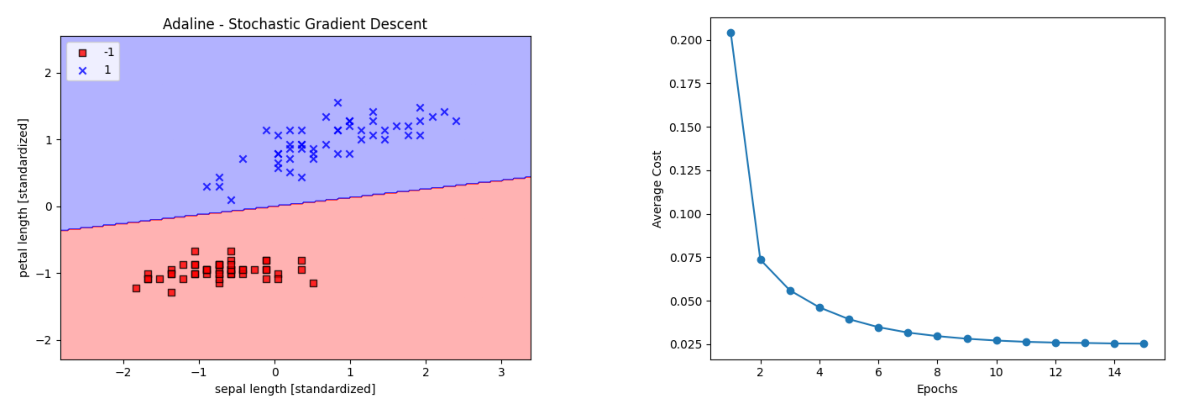


ALTERED DATA



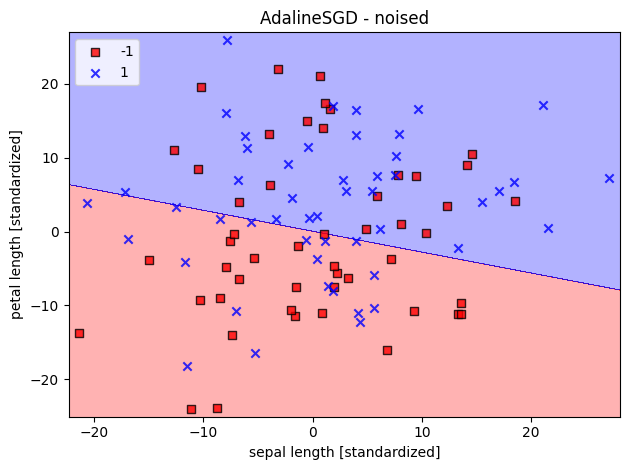

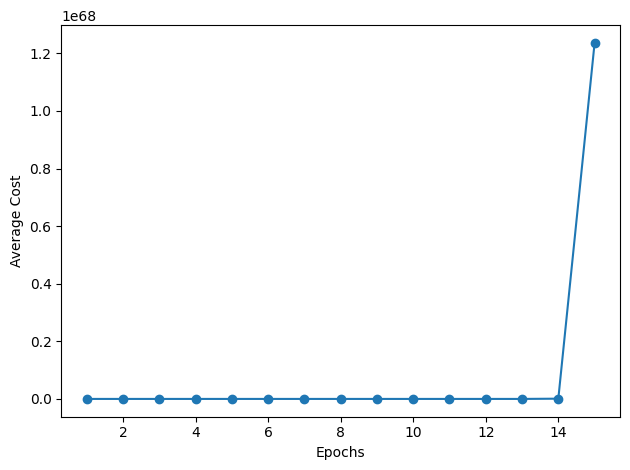

In [7]:
# NO NEED TO DEFINE AdalineSGD AGAIN

ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)

# Setting up the gaussian noise
gaussian_noise = np.random.normal(0, 10, X.shape)
X_std_noised = X_std + gaussian_noise

# Training the model after adding the noise
ada_sgd.fit(X_std_noised, y)

print("NORMAL DATA\n")
# REFERENCE: https://shorturl.at/xnIzu
import matplotlib.image as mpimg
figure = plt.figure(figsize=(15,15))
image1 = plt.subplot(121)
image2 = plt.subplot(122)
_ = image1.imshow(mpimg.imread('/content/adalineGSD_decision_boundary.png'))
_ = image2.imshow(mpimg.imread('/content/adalineGSD_epoch.png'))
image1.axis("off")
image2.axis("off")
plt.show()

print("\nALTERED DATA\n")
plot_decision_regions(X_std_noised, y, classifier=ada_sgd)
plt.title('AdalineSGD - noised')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_,
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

Same case as in AdalineGD, the dataset X became non-lineary separable after adding the noise.

3.4. Modify perceptron.py to get a code for Adaline

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
np.set_printoptions(suppress=True)

class Adaline(object):
  def __init__(self, xdim, epoch=10, learning_rate=0.01):
    self.epoch = epoch
    self.learning_rate = learning_rate
    self.weights = np.zeros(xdim + 1)

  def net_input(self, X):
    return np.dot(X, self.weights[1:]) + self.weights[0]

  def activate(self, X):
    return self.net_input(X)

  def fit(self, X, y):
    N = len(X)
    self.cost = []
    for epoch_idx in range(self.epoch):
      output = self.activate(X)
      error = (y-output)
      # redefined the weights and bias as per the assignment
      self.weights[1:] += (self.learning_rate / N) * np.dot(X.T, error)
      self.weights[0] += (self.learning_rate / N) * error.sum()
      cost_function = (error**2).sum() / (2*N)
      self.cost.append(cost_function)
      print(f"Epoch {epoch_idx+1} --> Cost: {round(cost_function, 3)}")
    return self

  # numpy.where(condition, x, y)
  # x = value to take if the condn. is true
  # y = value to take if the condn. is false

  def predict(self, X):
    return np.where(self.activate(X) >= 0.0, 1, -1)

  def score(self, X, y):
    output = self.predict(X)
    return round(np.mean(output == y), 3)

data_read = datasets.load_iris()
X = data_read.data
y = data_read.target
targets = data_read.target_names; features = data_read.feature_names

#----Take 2 classes in 2D--------------------------------------------
X2 = X[y<=1]; y2 = y[y<=1]
X2 = X2[:, [0,2]]
y2 = np.where(y2==0, -1, 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y2,
                                                random_state=None,
                                                train_size=0.7e0)

clf = Adaline(Xtrain.shape[1], epoch=20)
clf.fit(Xtrain, ytrain)

print(f"Training accuracy: ", clf.score(Xtrain, ytrain))
print(f"Testing accuracy: ", clf.score(Xtest, ytest))

Epoch 1 --> Cost: 0.5
Epoch 2 --> Cost: 0.484
Epoch 3 --> Cost: 0.472
Epoch 4 --> Cost: 0.461
Epoch 5 --> Cost: 0.452
Epoch 6 --> Cost: 0.442
Epoch 7 --> Cost: 0.433
Epoch 8 --> Cost: 0.424
Epoch 9 --> Cost: 0.415
Epoch 10 --> Cost: 0.407
Epoch 11 --> Cost: 0.398
Epoch 12 --> Cost: 0.39
Epoch 13 --> Cost: 0.382
Epoch 14 --> Cost: 0.374
Epoch 15 --> Cost: 0.366
Epoch 16 --> Cost: 0.359
Epoch 17 --> Cost: 0.351
Epoch 18 --> Cost: 0.344
Epoch 19 --> Cost: 0.337
Epoch 20 --> Cost: 0.33
Training accuracy:  1.0
Testing accuracy:  1.0


The cost function is trying to minimize the loss in every single epoch, little by little.